Author : Adi Aryanto (Gaussian Team/XY23)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data Loading**

In [3]:
url = '/content/drive/MyDrive/A_Final Research Project/TrialLab_ConcreteStrength/Concrete_Compressive_Modified.csv'
df = pd.read_csv(url, sep = ';')
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,CompressiveStrength_Mpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cement                   1030 non-null   float64
 1   BlastFurnaceSlag         1030 non-null   float64
 2   FlyAsh                   1030 non-null   float64
 3   Water                    1030 non-null   float64
 4   Superplasticizer         1030 non-null   float64
 5   CoarseAggregate          1030 non-null   float64
 6   FineAggregate            1030 non-null   float64
 7   Age_day                  1030 non-null   int64  
 8   CompressiveStrength_Mpa  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


# **Feature Engineering**

Create New Feature :

In [5]:
# Water to Cemen Ratio (W/C)
df['W/C_Ratio'] = df['Water'] / df['Cement']

# Water to Binder Ratio (W/B)
total_binder = df['Cement'] + df['BlastFurnaceSlag'] + df['FlyAsh']
df['W/B_Ratio'] = df['Water'] / (total_binder)

# Agregate Ratio
total_aggregate = df['CoarseAggregate'] + df['FineAggregate']
# Fine Aggregate Ratio
df['FineAgg_Ratio'] = df['FineAggregate']/total_aggregate
# Coarse Aggregate Ratio
df['CoarseAgg_Ratio'] = df['CoarseAggregate']/total_aggregate

# Binder Content
df['BinderContent'] = df['Cement'] + df['BlastFurnaceSlag'] + df['FlyAsh']

# Binder to Aggregate Ratio
df['BinderToAggregate_Ratio'] = total_binder / total_aggregate

# Superplasticizer to Binder Ratio
df['SuperplasticizerToBinder_Ratio'] = df['Superplasticizer']/total_binder

# Check The Current Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   BlastFurnaceSlag                1030 non-null   float64
 2   FlyAsh                          1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   CoarseAggregate                 1030 non-null   float64
 6   FineAggregate                   1030 non-null   float64
 7   Age_day                         1030 non-null   int64  
 8   CompressiveStrength_Mpa         1030 non-null   float64
 9   W/C_Ratio                       1030 non-null   float64
 10  W/B_Ratio                       1030 non-null   float64
 11  FineAgg_Ratio                   1030 non-null   float64
 12  CoarseAgg_Ratio                 10

Log-Curve Fitting : Age-Factor of The Concrete

In [6]:
from scipy.optimize import curve_fit

concrete_age = np.array([7, 14, 28, 80])
age_factor = np.array([0.7, 0.85, 1, 1.2])

# Fit Funtion a * np.log(t-c) + b to x and y
a_guess = 6
b_guess = 1.5
c_guess = 0.2

popt, pcov = curve_fit(
    lambda t, a, b, c: a * np.log(t-c) + b, concrete_age , age_factor,
    p0 = (a_guess, b_guess, c_guess)
)

# Optimized Value of the parameters
a = popt[0]
b = popt[1]
c = popt[2]

print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')


a = 0.1895066574548525
b = 0.3743826066477209
c = 1.4510258756495045


/tmp/ipython-input-812502394.py:3: RuntimeWarning: invalid value encountered in log
  age_factor_fitted = a * np.log(age_fitted - c) + b # Y-Axis


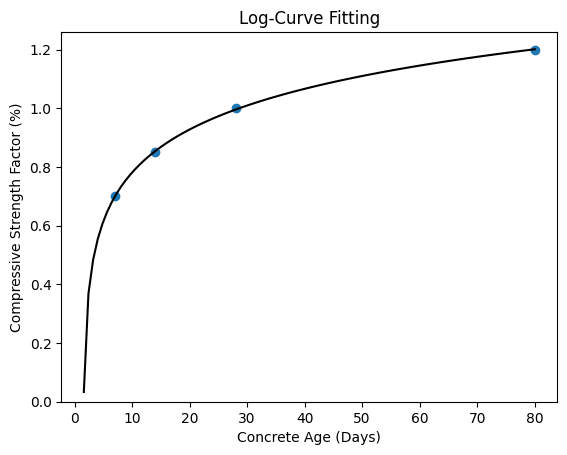

In [7]:
# Fitted Curve
age_fitted = np.linspace(0, np.max(concrete_age), 100) # X-Axis
age_factor_fitted = a * np.log(age_fitted - c) + b # Y-Axis

# Create The Plot
ax = plt.axes()
ax.scatter(concrete_age, age_factor, label = 'Actual Data')
ax.plot(age_fitted, age_factor_fitted, 'k', label = 'Fitted Curve')
ax.set_title('Log-Curve Fitting')
ax.set_ylabel('Compressive Strength Factor (%)')
ax.set_xlabel('Concrete Age (Days)')
ax.set_ylim(0)
ax.set_ylim(0)
plt.show()

The 'AgeDay' Parameter will be converted into a compressive strength factor based on the concrete age (days)

In [8]:
# Define the log-model of ag dactor
def strength_age_factor(days):
  a = 0.189
  b = 0.374
  c = 1.451
  return a * np.log(days - c) + b

# Create the new columns Age_Factor
df['Age_Factor'] = strength_age_factor(df['Age_day'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


The Modified Features

In [9]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,CompressiveStrength_Mpa,W/C_Ratio,W/B_Ratio,FineAgg_Ratio,CoarseAgg_Ratio,BinderContent,BinderToAggregate_Ratio,SuperplasticizerToBinder_Ratio,Age_Factor
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1028.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.748266,0.469233,0.442654,0.557346,409.252039,0.237229,0.014548,0.945461
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.314005,0.127123,0.035233,0.035233,92.780669,0.063985,0.013419,0.257961
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266893,0.235073,0.347841,0.461918,200.000000,0.101523,0.000000,0.456708
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.533333,0.383916,0.424062,0.528633,336.425000,0.185516,0.000000,0.697874
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.675349,0.471974,0.441296,0.558704,391.300000,0.223675,0.015504,0.993730
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,0.935165,0.561081,0.471367,0.575938,483.700000,0.291191,0.023704,1.129830
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882353,0.900000,0.538082,0.652159,640.000000,0.420776,0.056551,1.488328


# **Correlation Matrix**

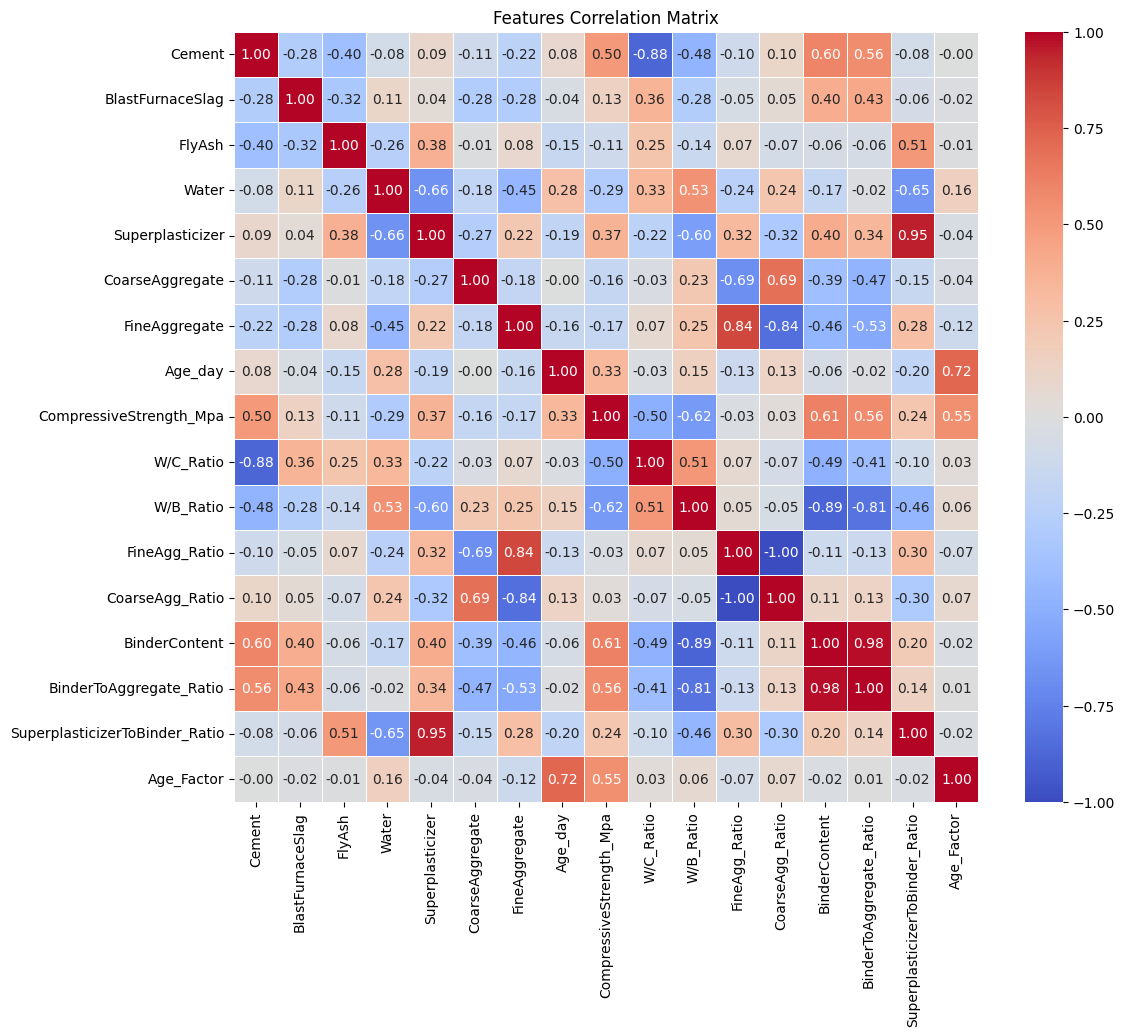

In [10]:
# Variables Correlation HeatMap
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot = True, linewidths = 0.5, fmt = '.2f', cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Features Correlation Matrix')
plt.show()

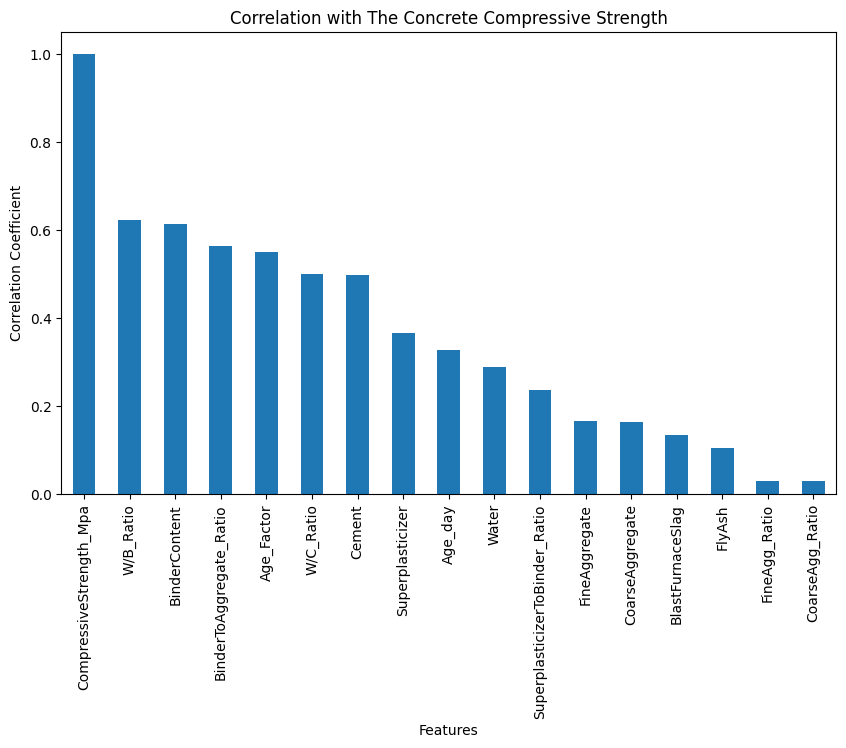

In [11]:
# Sort The Variables Correlation Based on the Correlation
target_corr = df.corr()['CompressiveStrength_Mpa']
target_corr_sorted = target_corr.abs().sort_values(ascending = False)
plt.figure(figsize= (10,6))
target_corr_sorted.plot(kind = 'bar')
plt.title(f'Correlation with The Concrete Compressive Strength')
plt.xlabel(f'Features')
plt.ylabel(f'Correlation Coefficient')
plt.show()

Select the features with the correlation above 0.35 to the target

In [12]:
# Selected Features for the Input
selected_features = []
for features in df.columns:
  if target_corr_sorted[features] >= 0.35:
    selected_features.append(features)

# Check The Correlation
print('==== Selected Features as the Input ====')
print(target_corr_sorted[selected_features])

==== Selected Features as the Input ====
Cement                     0.497832
Superplasticizer           0.366079
CompressiveStrength_Mpa    1.000000
W/C_Ratio                  0.500692
W/B_Ratio                  0.623087
BinderContent              0.613184
BinderToAggregate_Ratio    0.564333
Age_Factor                 0.551174
Name: CompressiveStrength_Mpa, dtype: float64


The Decriptive Analysis of the selected_features

In [13]:
df_selected = df[selected_features]

In [14]:
df_selected.describe()

,Cement,Superplasticizer,CompressiveStrength_Mpa,W/C_Ratio,W/B_Ratio,BinderContent,BinderToAggregate_Ratio,Age_Factor
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1028.000000
mean,281.167864,6.204660,35.817961,0.748266,0.469233,409.252039,0.237229,0.945461
std,104.506364,5.973841,16.705742,0.314005,0.127123,92.780669,0.063985,0.257961
min,102.000000,0.000000,2.330000,0.266893,0.235073,200.000000,0.101523,0.456708
25%,192.375000,0.000000,23.710000,0.533333,0.383916,336.425000,0.185516,0.697874
50%,272.900000,6.400000,34.445000,0.675349,0.471974,391.300000,0.223675,0.993730
75%,350.000000,10.200000,46.135000,0.935165,0.561081,483.700000,0.291191,1.129830
max,540.000000,32.200000,82.600000,1.882353,0.900000,640.000000,0.420776,1.488328


# **Pre-processing Data**

Missing-Value Data Treating

In [15]:
# Fill the missing value using the median()
df_selected[selected_features] = df_selected[selected_features].fillna(df_selected[selected_features].median())

/tmp/ipython-input-2708457309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[selected_features] = df_selected[selected_features].fillna(df_selected[selected_features].median())


In [16]:
missing_value = df_selected.isnull().sum()
print('Fill The Missing Data Done')
print(missing_value[missing_value > 0])

Fill The Missing Data Done
Series([], dtype: int64)


Outliers Data Cleaning

Check The Data Distribution using Boxplot

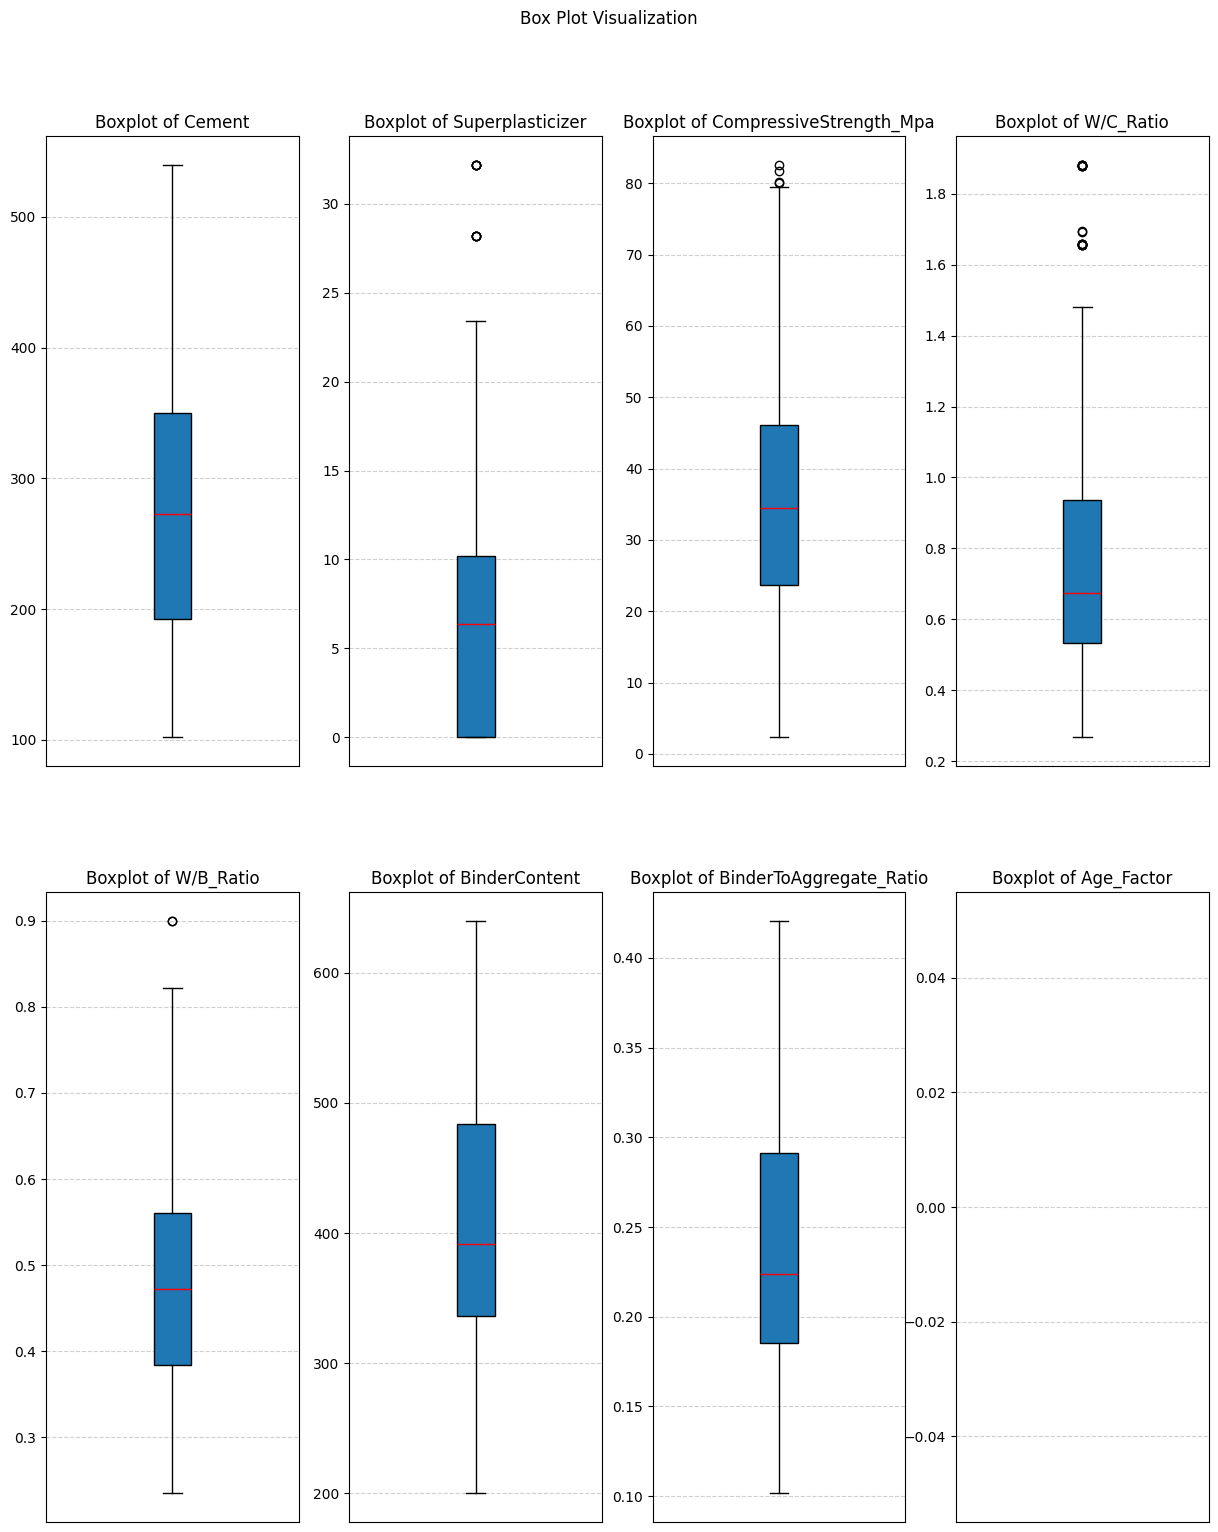

In [17]:
# Select the Columns to Plot
columns_to_plot = df_selected.columns.tolist() # Total 8 Variables

# Define the Subplots and Box Plots
rows = 2
cols = 4
total_plots = rows * cols

# Figure and Subplots Define
fig, axes = plt.subplots(rows, cols, figsize = (15, 18))
plt.subplots_adjust() #Spacing between plots

# Flatten 4x3 array of Axes objects into 1D Array
axes = axes.flatten()

# Looping for the variables and plots a boxplot each axis
for i, column in enumerate(columns_to_plot):
  if i < total_plots:
    ax = axes[i] # Get the current subplot axis

    # Boxplot
    ax.boxplot(df[column], vert = True, patch_artist = True, medianprops = dict(color = 'red'))

    # Boxplot Title
    ax.set_title(f'Boxplot of {column}')

    # Delete the x-axis (doesn't needed for one box per plot)
    ax.set_xticks([])

    # Add a light Grid
    ax.grid(axis = 'y', linestyle = '--', alpha = 0.6)

# Delete Empty
for i in range(len(columns_to_plot), total_plots):
  fig.plt.delaxes(axes[i])

fig.suptitle('Box Plot Visualization', y = 0.95)
plt.show()

Delete The Outliers

In [18]:
# Before the Outliers Cleaning
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cement                   1030 non-null   float64
 1   Superplasticizer         1030 non-null   float64
 2   CompressiveStrength_Mpa  1030 non-null   float64
 3   W/C_Ratio                1030 non-null   float64
 4   W/B_Ratio                1030 non-null   float64
 5   BinderContent            1030 non-null   float64
 6   BinderToAggregate_Ratio  1030 non-null   float64
 7   Age_Factor               1030 non-null   float64
dtypes: float64(8)
memory usage: 64.5 KB


Quartile Method

In [19]:
# Define The Border
Q1 = df_selected[selected_features].quantile(0.25)
Q3 = df_selected[selected_features].quantile(0.75)
IQR = Q3 - Q1

# Filter the Dataframe to keep only the data without outliers
condition = ~((df_selected[selected_features] < (Q1 - 1.5*IQR)) | (df_selected[selected_features] > (Q3 + 1.5*IQR))).any(axis = 1)
df_selected_cleaned = df_selected.loc[condition, selected_features]

# Check the cleaning result
df_selected_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 1 to 1029
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cement                   996 non-null    float64
 1   Superplasticizer         996 non-null    float64
 2   CompressiveStrength_Mpa  996 non-null    float64
 3   W/C_Ratio                996 non-null    float64
 4   W/B_Ratio                996 non-null    float64
 5   BinderContent            996 non-null    float64
 6   BinderToAggregate_Ratio  996 non-null    float64
 7   Age_Factor               996 non-null    float64
dtypes: float64(8)
memory usage: 70.0 KB


After the Outliers Cleaning

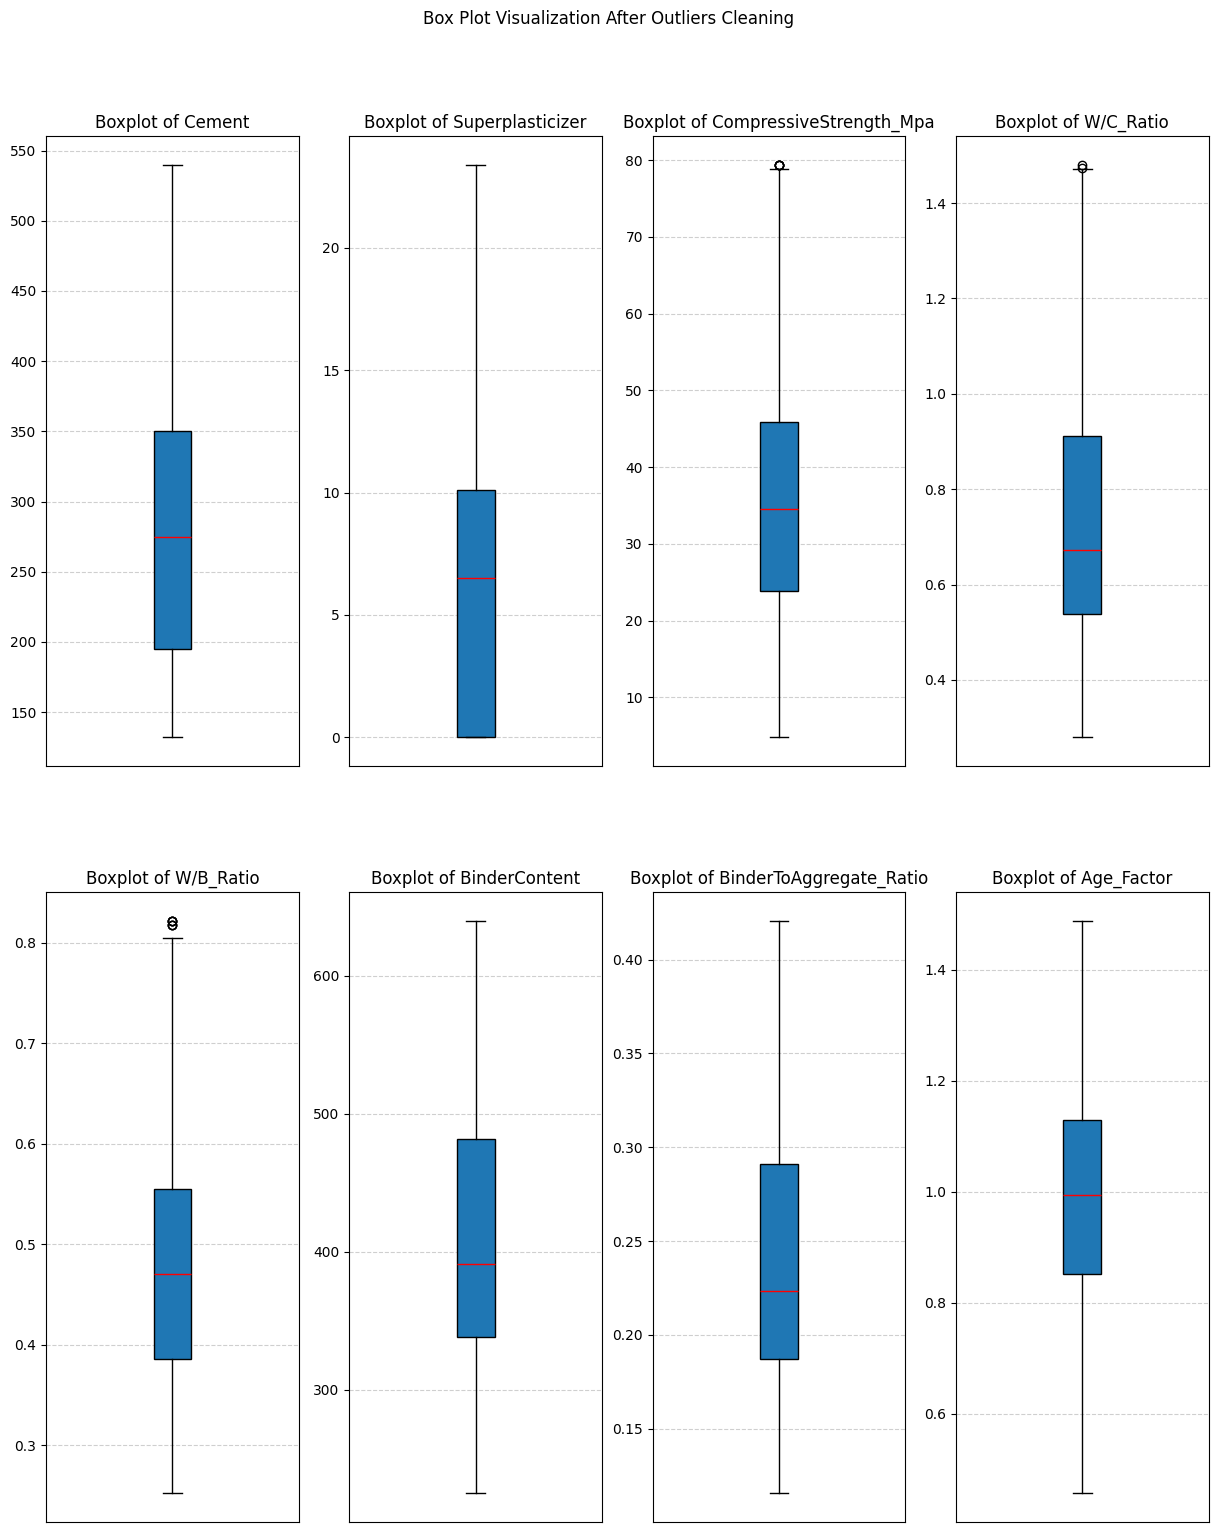

In [20]:
# Select the Columns to Plot
columns_to_plot = df_selected_cleaned.columns.tolist() # Total 8 Variables

# Define the Subplots and Box Plots
rows = 2
cols = 4
total_plots = rows * cols

# Figure and Subplots Define
fig, axes = plt.subplots(rows, cols, figsize = (15, 18))
plt.subplots_adjust() #Spacing between plots

# Flatten 4x3 array of Axes objects into 1D Array
axes = axes.flatten()

# Looping for the variables and plots a boxplot each axis
for i, column in enumerate(columns_to_plot):
  if i < total_plots:
    ax = axes[i] # Get the current subplot axis

    # Boxplot
    ax.boxplot(df_selected_cleaned[column], vert = True, patch_artist = True, medianprops = dict(color = 'red'))

    # Boxplot Title
    ax.set_title(f'Boxplot of {column}')

    # Delete the x-axis (doesn't needed for one box per plot)
    ax.set_xticks([])

    # Add a light Grid
    ax.grid(axis = 'y', linestyle = '--', alpha = 0.6)

# Delete Empty
for i in range(len(columns_to_plot), total_plots):
  fig.plt.delaxes(axes[i])

fig.suptitle('Box Plot Visualization After Outliers Cleaning', y = 0.95)
plt.show()

# **Feature Scaling**

In [21]:
# Split into Features(X) and target(y)
X = df_selected_cleaned[selected_features].drop(columns = ['CompressiveStrength_Mpa'])
y = df_selected_cleaned['CompressiveStrength_Mpa']

Data Before Scaling

In [22]:
def distribution_check(dataset):
  n_vars = dataset.shape[1]
  n_cols = 4
  n_rows = -(-n_vars//n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, n_rows*4))
  axes = axes.flatten()
  for i, column in enumerate(dataset.columns):
    dataset[column].hist(ax = axes[i], bins = 20, edgecolor = 'black', color = 'purple')
    dataset[column].plot.kde(ax = axes[i], color = 'red')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

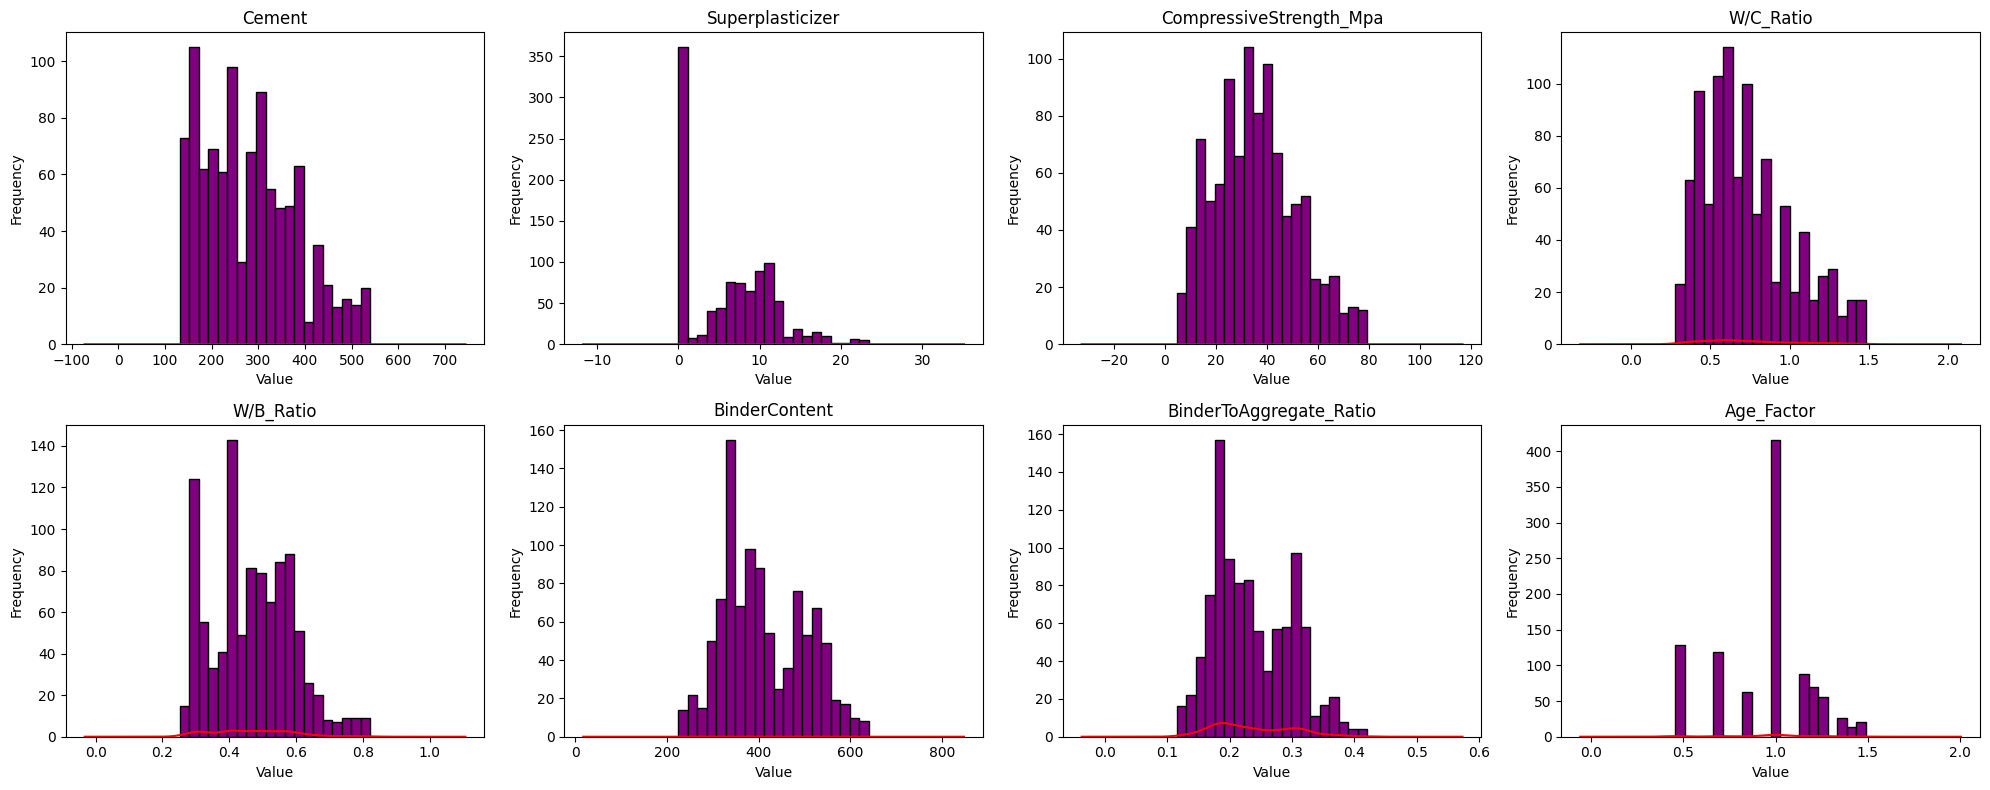

In [23]:
distribution_check(df_selected_cleaned)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Transform the Features
input_features = selected_features
input_features.remove('CompressiveStrength_Mpa')
X_scaled = X[input_features]
X_scaled[input_features] = scaler_X.fit_transform(X[input_features])
X_scaled = X_scaled.reset_index()
X_scaled = X_scaled.drop(columns = ['index'])

# Reshape the target into (-1,1) and transform the target
y_reshaped = y.values.reshape(-1, 1)
y_scaled = scaler_y.fit_transform(y_reshaped)
y_scaled = pd.DataFrame(y_scaled, columns = ['CompressiveStrength_Mpa'])

In [25]:
X_scaled.describe(include = 'all')

,Cement,Superplasticizer,W/C_Ratio,W/B_Ratio,BinderContent,BinderToAggregate_Ratio,Age_Factor
count,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02,9.960000e+02
mean,-2.710906e-16,1.141434e-16,-9.987548e-17,2.282868e-16,7.133963e-17,4.280378e-17,-6.456237e-16
std,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00
min,-1.482308e+00,-1.105574e+00,-1.609390e+00,-1.772156e+00,-2.037645e+00,-1.936278e+00,-1.908116e+00
25%,-8.613960e-01,-1.105574e+00,-6.940509e-01,-6.747056e-01,-7.884985e-01,-8.018531e-01,-3.699776e-01
50%,-6.619331e-02,8.016661e-02,-2.201370e-01,2.411818e-02,-2.025473e-01,-2.195860e-01,1.809729e-01
75%,6.765240e-01,7.414450e-01,6.242966e-01,7.208746e-01,7.983146e-01,8.491649e-01,7.104223e-01
max,2.558074e+00,3.163092e+00,2.629092e+00,2.921044e+00,2.541823e+00,2.911866e+00,2.105030e+00


In [26]:
y_scaled.describe(include = 'all')

,CompressiveStrength_Mpa
count,9.960000e+02
mean,-5.707171e-17
std,1.000502e+00
min,-1.904299e+00
25%,-7.368362e-01
50%,-7.828686e-02
75%,6.164819e-01
max,2.676540e+00


Data Distribution After Standarization

Input Features After Standarization


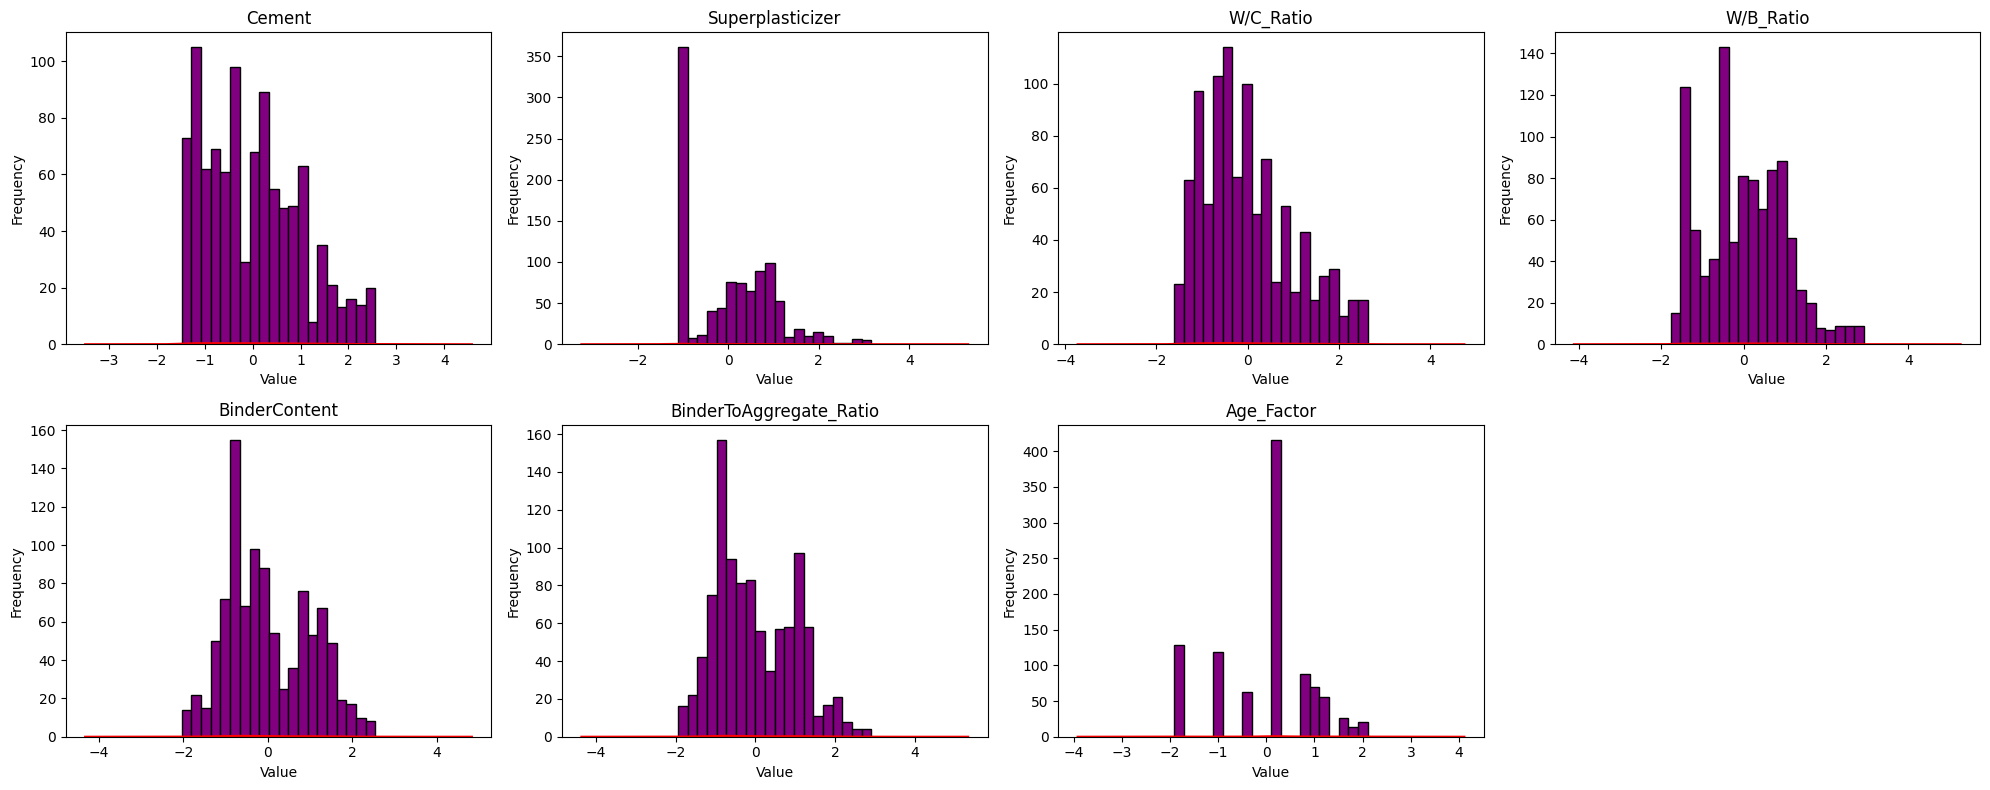

In [27]:
print('Input Features After Standarization')
distribution_check(X_scaled)

Target Parameter After Standarization


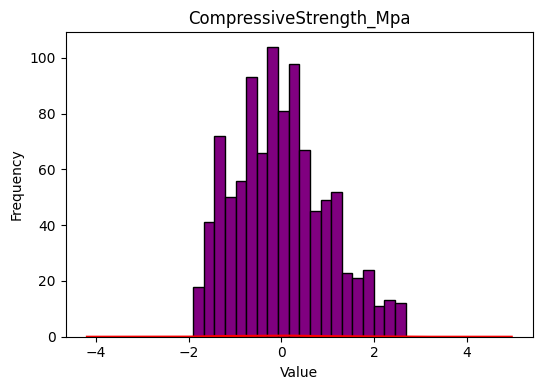

In [28]:
print('Target Parameter After Standarization')
distribution_check(y_scaled)

# **Machine Learning Model Training**

Splitting Data into training and testing set

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into 20% Test Set and 80% Training Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)

# Check The Length of training and testing set
print(f'Length of the training set : {len(X_train)}')
print(f'Length of the testing set : {len(X_test)}')

Length of the training set : 796
Length of the testing set : 200


In this case we'll perform some machine learning models such as :

*   Random Forest Regression
*   Gradient Boosting Regressor



# **Random Forest Regression Model**

Hyperparameter Tuning using Bayes Optimization

In [30]:
# Install the Library : scikit.optimize
!pip install scikit.optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.6 MB/s eta 0:00:00


In [31]:
# Hyperparameter tuning
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import time

Optimized Random Forest Regressor using Bayes Optimization

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Time Record Start
start_timer = time.time()

# Random Forest Model
rf_model = RandomForestRegressor(random_state = 42)
params_space = {
    'n_estimators' : Integer(10, 200),
    'max_depth' : Integer(1, 20),
    'min_samples_split' : Integer(2, 10),
    'min_samples_leaf' : Integer(1,10),
    'max_features' : Real(0.1, 1.0, prior = 'uniform')
}

# Optimization of RF-Regression Model
rf_model_optimizer = BayesSearchCV(
    random_state = 42,
    estimator = rf_model,
    search_spaces = params_space,
    n_iter = 32,
    cv = 3,
    n_jobs = -1
)

# Optimizing the model
rf_model_optimizer.fit(X_train, y_train)

# Best Model with Optimized Hyperparameter
optimized_parameters = rf_model_optimizer.best_params_
print(f'Best Optimized Hyperparameter : {optimized_parameters}')

# Final Model with optimized hyperparameter
rf_model_optimized = rf_model_optimizer.best_estimator_

# Predict Value using the Optimized RF Model
y_pred_optimized_rf = rf_model_optimized.predict(X_test)

# End Time Record
end_timer = time.time()
running_time = end_timer - start_timer
print(f'Execution Time : {running_time:.2f} secs')

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Optimized Hyperparameter : OrderedDict({'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200})
Execution Time : 125.22 secs


In [33]:
# Evaluate The Result
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# RF Optimized Model Evaluation
rf_optimized_r2 = r2_score(y_test, y_pred_optimized_rf)
rf_optimized_mae = mean_absolute_error(y_test, y_pred_optimized_rf)
rf_optimized_mse = mean_squared_error(y_test, y_pred_optimized_rf)

# RF Optimized
print('Model Evaluation Result :')
print(f'R2 - Score : {rf_optimized_r2:.3f}')
print(f'Mean Absolute Error : {rf_optimized_mae:.3f}')
print(f'Mean Squared Error : {rf_optimized_mse:.3f}')


Model Evaluation Result :
R2 - Score : 0.902
Mean Absolute Error : 0.202
Mean Squared Error : 0.080


Visualize Correlation

In [34]:
def visualize_pred_actual(y_actual_test,
                          y_actual_train,
                          y_prediction_test,
                          y_prediction_train,
                          title):
  plt.figure(figsize = (8, 8))
  plt.title(f'{title}')
  plt.xlabel('Actual Compressive Strength (Mpa)')
  plt.ylabel('Predicted Compressive Strength (Mpa)')

  # Scatter Plot Data
  # Prediction Test-set Data
  plt.scatter(y_actual_test, y_prediction_test, color = 'red', label = 'Test Set', s = 20)

  # Prediction Train-set Data
  plt.scatter(y_actual_train, y_prediction_train, color = 'blue', label = 'Train Set', s = 20)

  # X and Y-Axis Scaling
  # Get The Min-Max of Actual Value
  actual_min_value = min(y_actual_test.min(), y_actual_train.min())
  actual_max_value = max(y_actual_test.max(), y_actual_train.max())

  # Get The Min-Max of Predicted Value
  pred_min_value = min(y_prediction_test.min(), y_prediction_train.min())
  pred_max_value = max(y_prediction_test.max(), y_prediction_test.max())

  # XY-Axis Scaling
  # Minimum Value
  global_min_value = min(actual_min_value, pred_min_value)
  # Maximum Value
  global_max_value = max(pred_min_value, pred_max_value)

  xy_trend = [global_min_value, global_max_value]
  plt.plot(xy_trend, xy_trend, color = 'black', linewidth = 2)

  # Evaluation Metrics
  r2_test = (r2_score(y_actual_test, y_prediction_test)*100)
  r2_train = (r2_score(y_actual_train, y_prediction_train)*100)
  r2_display_test = f'R2-Test = {r2_test:.2f}%'
  r2_display_train = f'R2-Train = {r2_train:.2f}%'

  # Text Show
  plt.text(0.05, 0.95, r2_display_test, transform = plt.gca().transAxes, fontsize = 12, verticalalignment = 'top')
  plt.text(0.05, 0.90, r2_display_train, transform = plt.gca().transAxes, fontsize = 12, verticalalignment = 'top')

  # Legend
  plt.legend(
      loc = 'lower right',
      facecolor = '#f0f0f0',
      edgecolor = 'black',
      framealpha = 1,
      fontsize = 11
  )

  # Output
  plt.show()

Optimized Random Forest Model Performance

In [35]:
# Actual Test Data
y_actual_test = y_test.values.reshape(-1, 1)
y_actual_test_unscaled = scaler_y.inverse_transform(y_test)

# Train Test Data
y_actual_train = y_train.values.reshape(-1, 1)
y_actual_train_unscaled = scaler_y.inverse_transform(y_train)

# Predicted Test Data
y_prediction_test = rf_model_optimized.predict(X_test)
y_prediction_test = y_prediction_test.reshape(-1, 1)
y_prediction_test_unscaled = scaler_y.inverse_transform(y_prediction_test)

# Predicted Train Data
y_prediction_train = rf_model_optimized.predict(X_train)
y_prediction_train = y_prediction_train.reshape(-1, 1)
y_prediction_train_unscaled = scaler_y.inverse_transform(y_prediction_train)

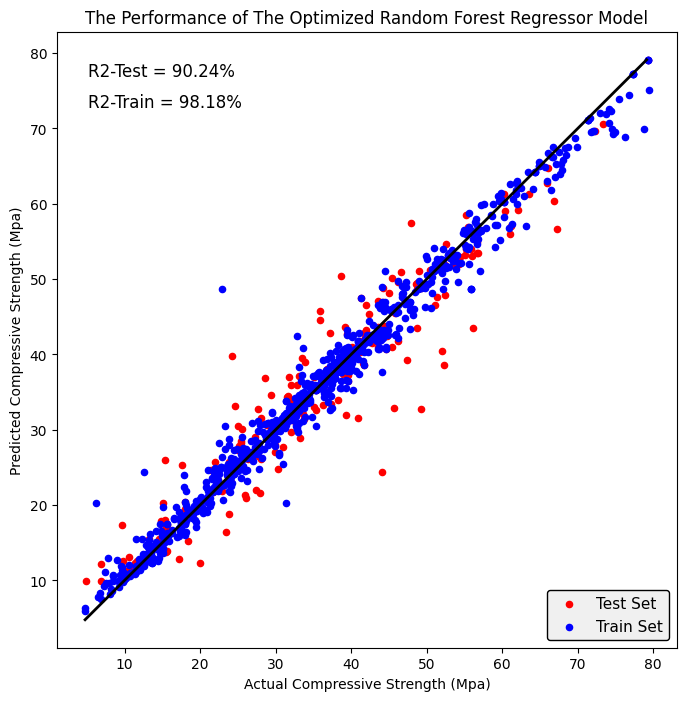

In [36]:
# Training Model Evaluation
visualize_pred_actual(y_actual_test_unscaled, # actual_test len : 200
                      y_actual_train_unscaled, # actual_train len : 796
                      y_prediction_test_unscaled, # predicted_test len : 200
                      y_prediction_train_unscaled, # predicted_train len : 796
                      'The Performance of The Optimized Random Forest Regressor Model')

# **Gradient Boosting Regressor**

In [37]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [38]:
start_timer = time.time()
# Hyperparameter Space
params_space = {
    'learning_rate' : Real(0.01, 0.3, prior = 'log-uniform'),
    'max_depth': Integer(3, 15),
    'subsample' : Real(0.5, 1.0),
    'colsample_bytree' : Real(0.5, 1.0),
    'n_estimators' : Integer(10, 200)
}

# Define XGBoost Regressor Model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    random_state = 42
)

# Bayesian Optimizer
xgb_optimizer = BayesSearchCV(
    random_state = 42,
    estimator = xgb_model, # estimator diisi dengan model
    search_spaces = params_space,
    n_iter = 25,
    cv = 3,
    n_jobs = -1,
    verbose = 2
)

# Perform the optimization
xgb_optimizer.fit(X_train, y_train)

# Optimized Hyperparameter Result
optimized_hyperparameter = xgb_optimizer.best_params_
print(f'Optimized Hyperparameter : {optimized_hyperparameter}')

# Predicting Value using The Optimized XGB Model
xgb_model_optimized = xgb_optimizer.best_estimator_
y_pred_optimized_xgb = xgb_model_optimized.predict(X_test)

# End Time Record and Output
end_timer = time.time()
running_time = end_timer - start_timer
print(f'Running Time : {running_time:.2f} secs')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Optimized Extreme Gradient Boosting Performance

In [39]:
# Actual Test Data
y_actual_test = y_test.values.reshape(-1, 1)
y_actual_test_unscaled = scaler_y.inverse_transform(y_actual_test)

# Train Test Data
y_actual_train = y_train.values.reshape(-1, 1)
y_actual_train_unscaled = scaler_y.inverse_transform(y_actual_train)

# Predicted Test Data
y_prediction_test = xgb_model_optimized.predict(X_test)
y_prediction_test = y_prediction_test.reshape(-1, 1)
y_prediction_test_unscaled = scaler_y.inverse_transform(y_prediction_test)

# Predicted Train Data
y_prediction_train = xgb_model_optimized.predict(X_train)
y_prediction_train = y_prediction_train.reshape(-1, 1)
y_prediction_train_unscaled = scaler_y.inverse_transform(y_prediction_train)
title = 'The Performance of XGBoost Optimized Model'

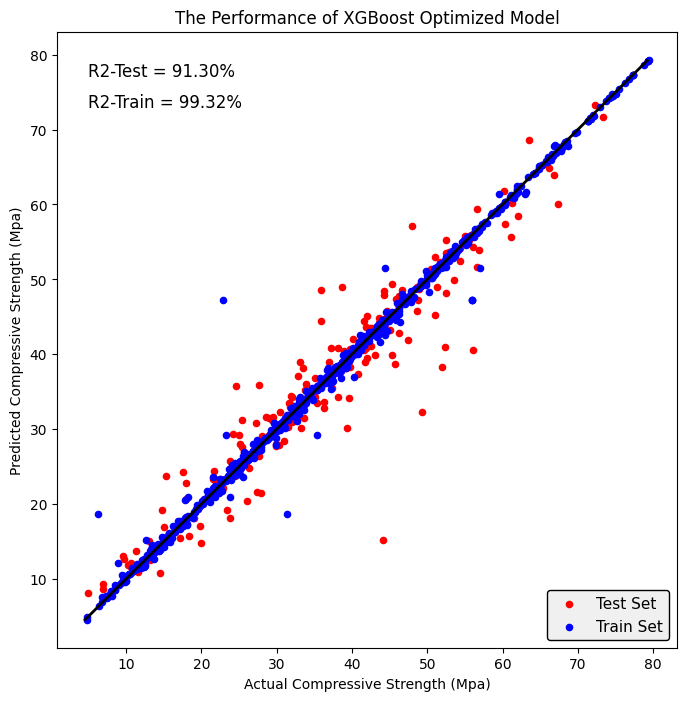

In [40]:
visualize_pred_actual(y_actual_test_unscaled,
                      y_actual_train_unscaled,
                      y_prediction_test_unscaled,
                      y_prediction_train_unscaled,
                      title)

# **Support Vector Machine Regression**

Optimization Using Bayesian Optimization

In [41]:
# Import SVM Model Library
from sklearn.svm import SVR
from skopt.space import Real, Categorical, Integer
from skopt.callbacks import DeltaYStopper

In [42]:
# Start Time Record
start_timer = time.time()

# Hyperparameter Space
params_space = {
    'kernel' : Categorical(['rbf']),
    'C' : Real(1e-3, 1.0, prior='log-uniform'),
    'epsilon' : Real(1e-4, 1.0, prior='log-uniform'),
    'gamma' : Real(1e-4, 1e1, prior='log-uniform'),
}

# Define the SVR Model
svm_model = SVR()

# Bayesian Optimizer
svm_optimizer = BayesSearchCV(
    random_state = 42,
    estimator = svm_model,
    search_spaces = params_space,
    n_iter = 25,
    cv = 3,
    n_jobs = -1,
    verbose = 2
)

# Perform the optimization
svm_optimizer.fit(X_train, y_train, callback = [DeltaYStopper(delta = 0.001, n_best = 5)])

# Optimized Hyperparameter Result
optimized_hyperparameter = svm_optimizer.best_params_

# Optimized SVM Model
svm_model_optimized = svm_optimizer.best_estimator_

# End Time Record
end_timer = time.time()
running_time = end_timer - start_timer

# Output
print(f'Optimized Hyperparameters Result : {optimized_hyperparameter}')
print(f'Running Time : {running_time:.2f} secs')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimized SVR Performance

In [43]:
# Actual Test Data
y_actual_test = y_test.values.reshape(-1, 1)
y_actual_test_unscaled = scaler_y.inverse_transform(y_actual_test)

# Training Test Data
y_actual_train = y_train.values.reshape(-1, 1)
y_actual_train_unscaled = scaler_y.inverse_transform(y_actual_train)

# Predicted Test Data
y_prediction_test = svm_model_optimized.predict(X_test)
y_prediction_test = y_prediction_test.reshape(-1, 1)
y_prediction_test_unscaled = scaler_y.inverse_transform(y_prediction_test)

# Predicted Train Data
y_prediction_train = svm_model_optimized.predict(X_train)
y_prediction_train = y_prediction_train.reshape(-1, 1)
y_prediction_train_unscaled = scaler_y.inverse_transform(y_prediction_train)
title = 'The Performance of Support Vector Regression Optimized Model'

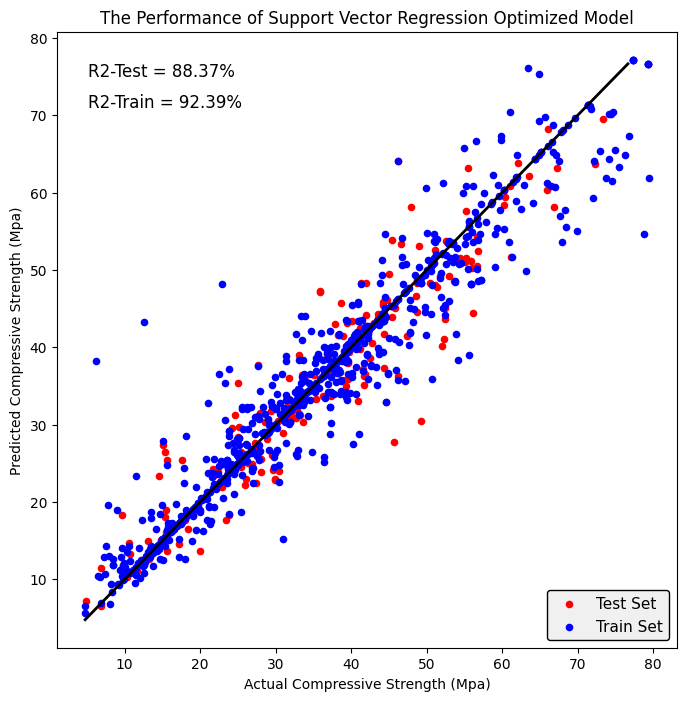

In [44]:
visualize_pred_actual(y_actual_test_unscaled,
                      y_actual_train_unscaled,
                      y_prediction_test_unscaled,
                      y_prediction_train_unscaled,
                      title)

# **Linear Regression**

In [48]:
from sklearn.linear_model import LinearRegression
from skopt.space import Real, Categorical, Integer

In [51]:
# Initiate the model
LR_model = LinearRegression()

# Hyperparameter Space
params_space = {
    'fit_intercept' : Categorical([True, False]),
    'copy_X' : Categorical([True, False]),
    'n_jobs' : Integer(2, 5)
}

# Bayesian Optimization
LR_optimizer = BayesSearchCV(
    random_state = 42,
    estimator = LR_model,
    search_spaces = params_space,
    n_iter = 25,
    cv = 3,
    n_jobs = -1,
    verbose = 2
)

# Perform the optimization
LR_optimizer.fit(X_train, y_train)

# Optimized Hyperparameter Result
optimized_hyperparameter = LR_optimizer.best_params_

# Optimized LR Model
LR_model_optimized = LR_optimizer.best_estimator_

# Optimization Result
print('============ Hyperparameter Optimization Result ==============')
print(f'{optimized_hyperparameter}')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.False_, np.int64(2)] before, using random point [True, False, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.False_, np.True_, np.int64(4)] before, using random point [True, True, np.int64(3)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.True_, np.int64(4)] before, using random point [False, True, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.False_, np.int64(2)] before, using random point [True, True, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.False_, np.int64(2)] before, using random point [False, False, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.False_, np.int64(4)] before, using random point [True, False, np.int64(2)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.False_, np.int64(4)] before, using random point [True, True, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.True_, np.False_, np.int64(5)] before, using random point [True, True, np.int64(3)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.False_, np.True_, np.int64(2)] before, using random point [False, False, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.False_, np.False_, np.int64(3)] before, using random point [True, True, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.False_, np.False_, np.int64(3)] before, using random point [True, False, np.int64(4)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
============ Hyperparameter Optimization Result ==============
OrderedDict({'copy_X': True, 'fit_intercept': False, 'n_jobs': 5})


Optimized LR Performance

In [52]:
# Actual Test Data
y_actual_test = y_test.values.reshape(-1, 1)
y_actual_test_unscaled = scaler_y.inverse_transform(y_actual_test)

# Training Test Data
y_actual_train = y_train.values.reshape(-1, 1)
y_actual_train_unscaled = scaler_y.inverse_transform(y_actual_train)

# Predicted Test Data
y_prediction_test = LR_model_optimized.predict(X_test)
y_prediction_test = y_prediction_test.reshape(-1, 1)
y_prediction_test_unscaled = scaler_y.inverse_transform(y_prediction_test)

# Predicted Train Data
y_prediction_train = LR_model_optimized.predict(X_train)
y_prediction_train = y_prediction_train.reshape(-1, 1)
y_prediction_train_unscaled = scaler_y.inverse_transform(y_prediction_train)
title = 'The Performance of the Optimized Linear Regression Model'

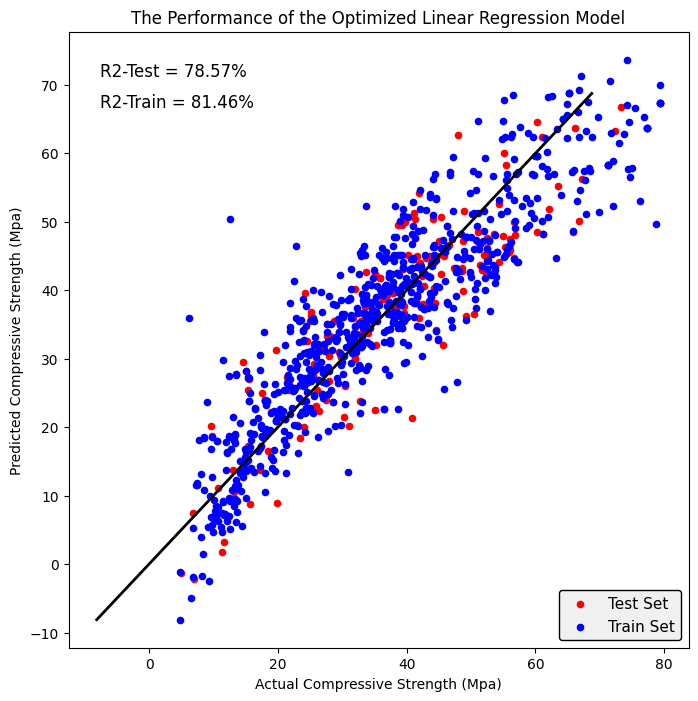

In [53]:
visualize_pred_actual(y_actual_test_unscaled,
                      y_actual_train_unscaled,
                      y_prediction_test_unscaled,
                      y_prediction_train_unscaled,
                      title)

# **Model Evaluation**

In [72]:
models = {
    'Random Forest Regressor' : rf_model_optimized,
    'Extreme Gradient Boost Regression' : xgb_model_optimized,
    'Support Vector Machine Regressor' : svm_model_optimized,
    'Linear Regression' : LR_model_optimized
}

In [115]:
# New Dictionary --> Evaluation Table
evaluation_table = {
    'Model' : [],
    'Mean Absolute Error' : [],
    'Mean Squared Error' : [],
    'R2-Score Training (%)' : [],
    'R2-Score Testing (%)' : [],
}

# Add MSE Calculation
for name, model in models.items():
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  r2_per_model_test = (r2_score(y_test, y_pred_test))*100
  r2_per_model_train = (r2_score(y_train, y_pred_train))*100
  mse_per_model = mean_squared_error(y_test, y_pred_test)
  mae_per_model = mean_absolute_error(y_test, y_pred_test)
  evaluation_table['Model'].append(name)
  evaluation_table['Mean Absolute Error'].append(mae_per_model)
  evaluation_table['Mean Squared Error'].append(mse_per_model)
  evaluation_table['R2-Score Training (%)'].append(r2_per_model_train)
  evaluation_table['R2-Score Testing (%)'].append(r2_per_model_test)

# Create a new DataFrame using the previous dictionary
results = pd.DataFrame(evaluation_table)
results.head()

,Model,Mean Absolute Error,Mean Squared Error,R2-Score Training (%),R2-Score Testing (%)
0,Random Forest Regressor,0.202240,0.079715,98.177276,90.240596
1,Extreme Gradient Boost Regression,0.168280,0.071097,99.315017,91.295648
2,Support Vector Machine Regressor,0.217877,0.095011,92.386723,88.367905
3,Linear Regression,0.335073,0.175056,81.458869,78.568065


Visualization of the Model Performance Comparison

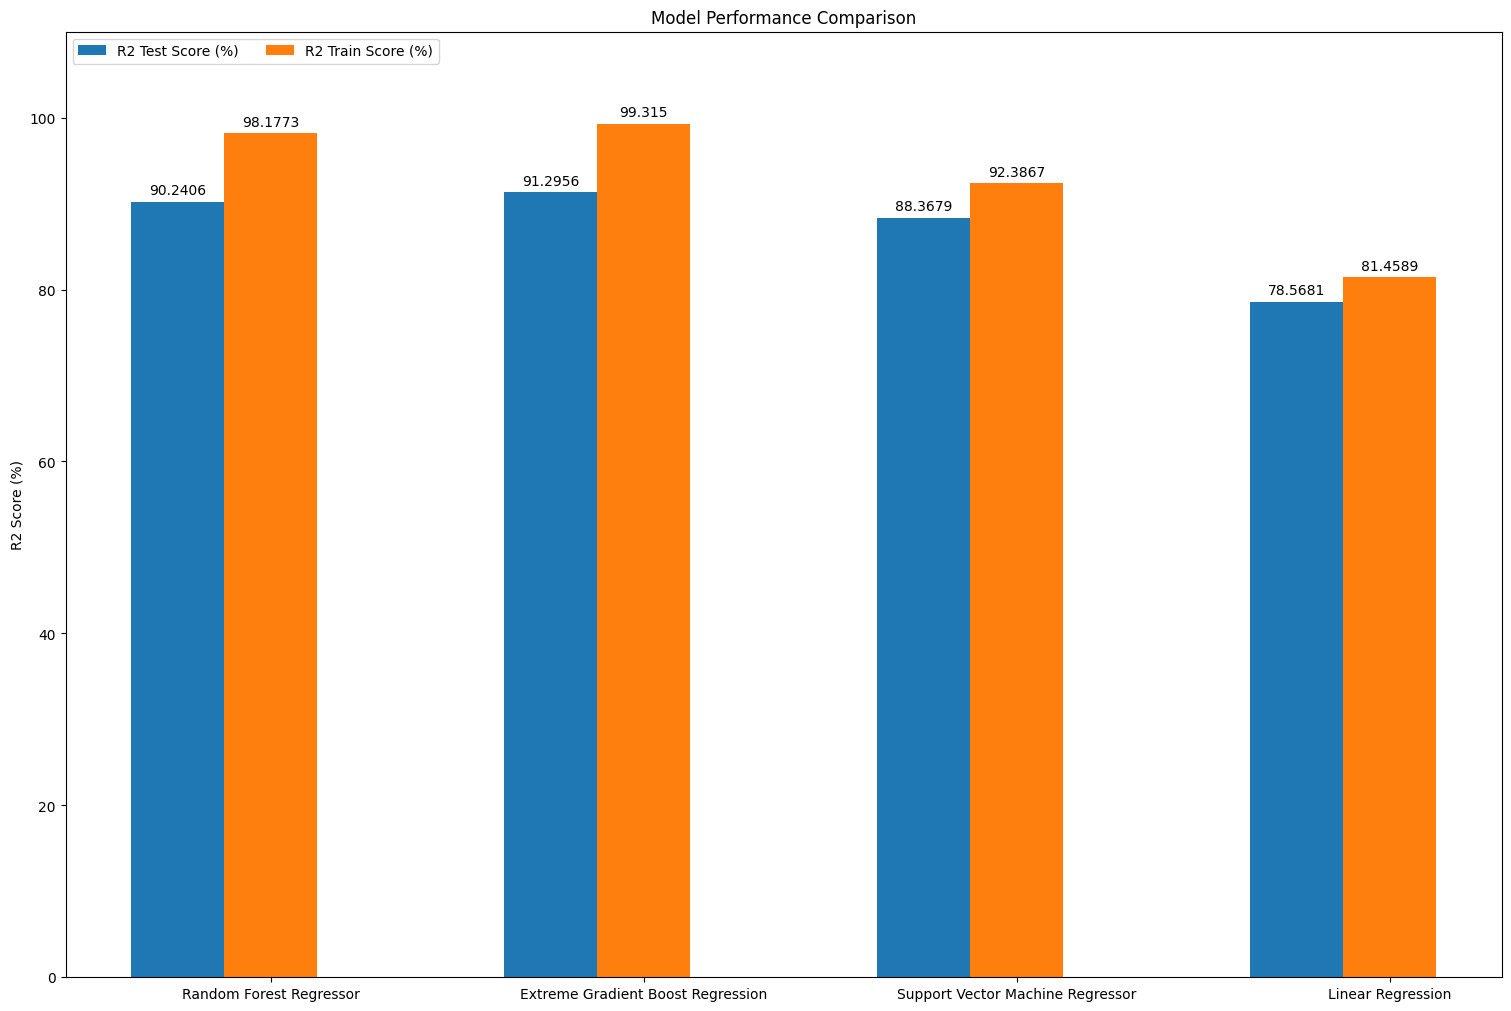

In [130]:
model_type = results['Model']
evaluation_used = {
    'R2 Test Score (%)' : results['R2-Score Testing (%)'],
    'R2 Train Score (%)' : results['R2-Score Training (%)'],
}

x = np.arange(len(model_type))
width = 0.25 # Width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize = (15, 10), layout = 'constrained')

for evaluate, values in evaluation_used.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, values, width, label = evaluate)
  ax.bar_label(rects, padding = 3)
  multiplier += 1

# Fig Attribute
ax.set_ylabel('R2 Score (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width, model_type)
ax.legend(loc = 'upper left', ncols = 3)
ax.set_ylim(0, 110) # Persentage Limit is bounded by (0, 100)

plt.show()

# **Summary**

The Best Model is the Extreme Gradient Boost Regression with R2-Score <code>91.3 %</code>